In [107]:
import numpy as np
import math as math
import pandas as pd
import matplotlib.pyplot as plt

VolumetricData = pd.read_csv(r'C:\Users\abhar\Downloads\Volumetric_RegressionDataSet.csv')
VolumetricData.shape


(4226, 141)

In [108]:
X = VolumetricData.iloc[0:1221,1:139]
Y = VolumetricData.iloc[0:1221,139]

In [109]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error  
from scipy.stats import gaussian_kde
from keras.models import Sequential 
from keras.layers import Dense
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [110]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

The r^2 value of the model is 0.630052089719479


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


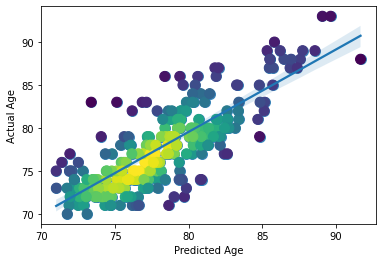

In [111]:
#Linear Regression 
Linear_Regression = LinearRegression()
Linear_Regression.fit(X_train, Y_train)
Linear_Regression.predict(X_test)

r2 = metrics.r2_score(Y_test, Linear_Regression.predict(X_test))
print('The r^2 value of the model is',r2)
#sns.scatterplot(Linear_Regression.predict(X_test),Y_test)
#sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([Linear_Regression.predict(X_test),Y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(Linear_Regression.predict(X_test),Y_test, c=z, s=100)
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()


The r^2 value of the model is 0.630052089719479


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


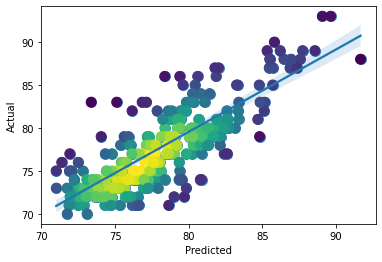

In [112]:
#Multiple Linear Regression
multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, Y_train)

y_pred_MLR_test = multiple_linear_reg.predict(X_test)

r2_MLR = metrics.r2_score(Y_test,y_pred_MLR_test)
print('The r^2 value of the model is',r2)

#sns.scatterplot(y_pred_MLR_test,Y_test)
#sns.regplot(y_pred_MLR_test ,Y_test, fit_reg=True, scatter_kws={"s": 100})

XY = np.vstack([y_pred_MLR_test,Y_test])
z = gaussian_kde(XY)(XY)
fig, ax = plt.subplots()
sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(y_pred_MLR_test,Y_test, c=z, s=100)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [113]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
tree.plot_tree(DTree)

[Text(165.0507693195813, 211.7178947368421, 'X[19] <= 787.3\nmse = 23.501\nsamples = 976\nvalue = 78.317'),
 Text(63.17378617610837, 200.2736842105263, 'X[129] <= 2.456\nmse = 15.424\nsamples = 502\nvalue = 76.384'),
 Text(22.37841133004926, 188.82947368421054, 'X[57] <= 1286210.5\nmse = 19.22\nsamples = 184\nvalue = 78.326'),
 Text(2.9686699507389163, 177.38526315789474, 'X[9] <= 1500.4\nmse = 6.484\nsamples = 17\nvalue = 85.471'),
 Text(1.3194088669950739, 165.94105263157894, 'X[80] <= 1.918\nmse = 0.889\nsamples = 3\nvalue = 80.333'),
 Text(0.6597044334975369, 154.49684210526317, 'mse = 0.0\nsamples = 2\nvalue = 81.0'),
 Text(1.9791133004926107, 154.49684210526317, 'mse = 0.0\nsamples = 1\nvalue = 79.0'),
 Text(4.617931034482758, 165.94105263157894, 'X[14] <= 297.1\nmse = 0.816\nsamples = 14\nvalue = 86.571'),
 Text(3.298522167487685, 154.49684210526317, 'X[80] <= 2.079\nmse = 0.188\nsamples = 4\nvalue = 87.75'),
 Text(2.6388177339901477, 143.05263157894737, 'mse = 0.0\nsamples = 1\

Error in callback <function flush_figures at 0x000001E75CFD5EA0> (for post_execute):


KeyboardInterrupt: 

The testing accuracy for DTree is:  0.6014876324698668


C:\Users\abhar\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


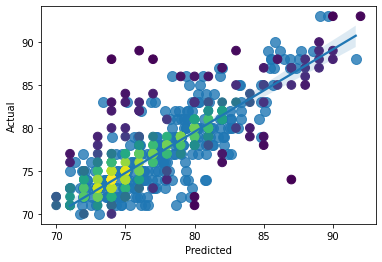

In [120]:
DTree = tree.DecisionTreeRegressor()
DTree = DTree.fit(X_train, Y_train)
DTree.predict(X_test)

accuracy_DTree_test = r2_score(Y_test, DTree.predict(X_test))
print("The testing accuracy for DTree is: ", accuracy_DTree_test)

#plt.figure(figsize=(10,10))
#sns.regplot(DTree.predict(X_test),Y_test, fit_reg=True, scatter_kws={"s": 100})

#sns.scatterplot(DTree.predict(X_test),Y_test)
XY2 = np.vstack([DTree.predict(X_test),Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()

sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(DTree.predict(X_test),Y_test, c=z, s=75)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Epoch 1/10
49/49 [==============================] - 1s 4ms/step - loss: 5854.7231
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 4896.7207
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 3864.1545
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 2938.4131
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 2114.1621
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 1478.1248
Epoch 7/10
49/49 [==============================] - 0s 5ms/step - loss: 985.5406
Epoch 8/10
49/49 [==============================] - 0s 4ms/step - loss: 646.4188
Epoch 9/10
49/49 [==============================] - 0s 4ms/step - loss: 402.3079
Epoch 10/10
49/49 [==============================] - 0s 4ms/step - loss: 240.8504
64.72554
518     83
118     73
1054    74
359     80
935     80
        ..
730     74
611     88
330     78
419     76
513     84
Name: Age, Length: 245, dtype: int64
The testing accu

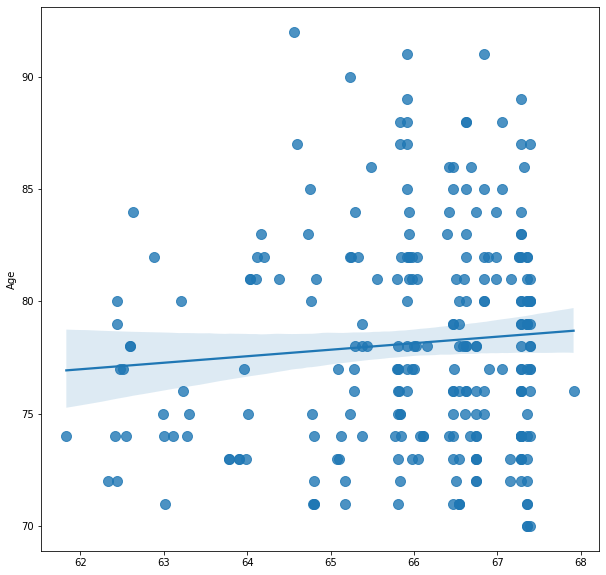

In [101]:
# create ANN model

ANNmodel = Sequential()
ANNmodel.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
ANNmodel.add(Dense(units=200, kernel_initializer='normal', activation='tanh'))
ANNmodel.add(Dense(1, kernel_initializer='normal'))
ANNmodel.compile(loss='mean_squared_error', optimizer='adam')
ANNmodel.fit(X_train, Y_train ,batch_size = 20, epochs = 10, verbose=1)

model1 = [x[0] for x in ANNmodel.predict(X_test)]
print(model1[0])
print(Y_test)

plt.figure(figsize=(10,10))
sns.regplot(x=model1,y=Y_test, fit_reg=True, scatter_kws={"s": 100})

#XY2 = np.vstack([model1,Y_test])
#z = gaussian_kde(XY2)(XY2)
#fig, ax = plt.subplots()
#ax.scatter(model1,Y_test, c=z, s=75)
#ax.set_xlabel('Predicted Age')
#ax.set_ylabel('Actual Age')
#plt.show()

accuracy_ANN_test = r2_score(Y_test, ANNmodel.predict(X_test))
print("The testing accuracy for DTree is: ", accuracy_ANN_test)



The testing accuracy for DTree is:  -6.358153301973272


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 138 is different from 156)

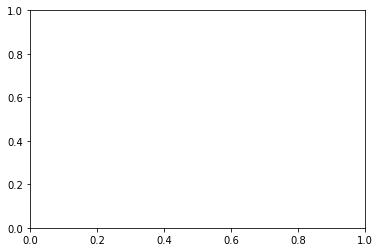

In [104]:
from sklearn.linear_model import Perceptron

Percep = Perceptron(tol=1e-3, random_state=0)
Percep.fit(X_train, Y_train)
Percep.predict(X_test)

accuracy_Percep = r2_score(Y_test, Percep.predict(X_test))
print("The testing accuracy for DTree is: ", accuracy_ANN_test)

XY2 = np.vstack([Percep.predict(X_test),Y_test])
z = gaussian_kde(XY2)(XY2)
fig, ax = plt.subplots()

sns.regplot(Linear_Regression.predict(X_test) ,Y_test, fit_reg=True, scatter_kws={"s": 100})
ax.scatter(Percep.predict(X_test),Y_test, c=z, s=75)
ax.set_xlabel('Predicted Age')
ax.set_ylabel('Actual Age')
plt.show()